In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import numpy as np
import numpy.random as nprd
import matplotlib.pyplot as plt
import seaborn as sns
from numbers import Number

from src.function_helper import FunctionHelper, Quadratic, LogAffineFunction, LogBarrier
from src.custom_types import Line
from src.optimisation import UnconstrainedOptimizer


In [3]:
Q = np.array([[1, 2], [2, 4]])
p = np.array([1, -1])

test_func = Quadratic(Q=Q, p=p)

test_func_2 = test_func + 10
test_func_3 = test_func * 2

In [4]:
t_range = (-11, 10)
x0 = np.array([0, 0])
direction = np.array([1, 1])
n = 1000
offset = 1
order = 1

In [5]:
line = Line(
    x0=np.array([0, 0]),
    direction=np.array([1, 1])
)

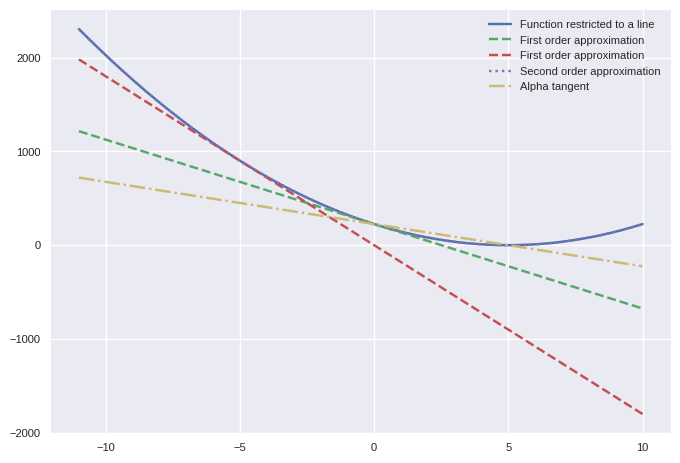

In [6]:
fig, ax = plt.subplots()

line = Line(
    x0=np.array([-5, -5]),
    direction=np.array([1, 1]),
    t_range=(-11, 10),
    n=1000
)

test_func.plot_line(line, ax=ax, label="Function restricted to a line")
test_func.plot_taylor_approximation(line, order=1, ax=ax, linestyle='--', label="First order approximation")
test_func.plot_taylor_approximation(line, order=1, offset=-5, ax=ax, linestyle='--', label="First order approximation")
test_func.plot_taylor_approximation(line, order=2, ax=ax, linestyle='dotted', label="Second order approximation")
test_func.plot_alpha_tangent(line, alpha=0.5, ax=ax, linestyle='-.', label="Alpha tangent")

In [7]:
# mini_hess = lambda x: x.reshape(-1, 1) @ x.reshape(1, -1)
# mu = 1e3
# # f = lambda x: np.nan_to_num(c.T @ x - np.sum(np.log(b - a @ x)), nan=np.inf)
# # g = lambda x: c - a.T @ (1 /(b - a @ x))
# # h = lambda x: -a.T @ np.diag(1 /(b - a @ x)**2) @ a
# f = lambda x: (np.log(b - a.T @ x) - np.log(b + a.T @ x))
# g = lambda x: (a / (b - a.T @ x)) - mu*(a / (b + a.T @ x))
# h = lambda x: mu*(mini_hess(a) / (b - a.T @ x)**2) + mu*(mini_hess(a) / (b + a.T @ x)**2)

In [8]:
N = 100
Q = nprd.uniform(-1, 1, size=(N, N))
p = nprd.uniform(-1, 1, size=(N))

In [9]:
ex_f = Quadratic(Q.T @ Q/10, p)
x0 = np.zeros(N)

In [10]:
pb = UnconstrainedOptimizer(ex_f, x0, method="newton")
pb.update_dir()

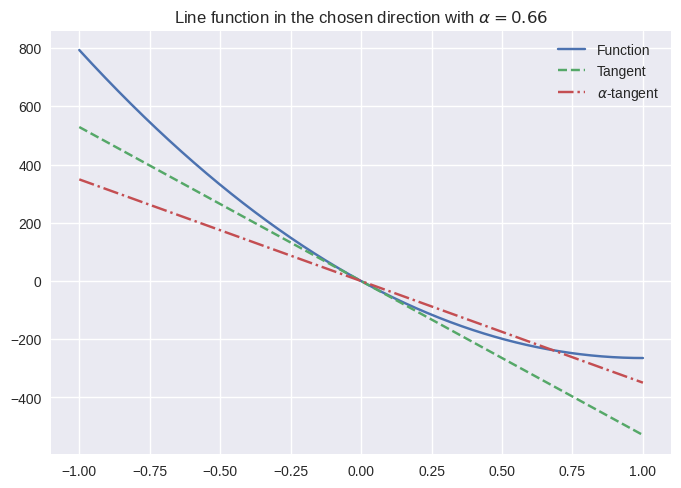

In [13]:
pb.plot_line(0.66, (-1, 1))

In [14]:
pb.optimise(1e-8, alpha=0.66, beta=0.66, verbose=True)

Step 1:
	 Criterion = 3.06e+01
	 y_1 = -2.3e+02
	 y_0 - y_1 = 2.3e+02
Step 2:
	 Criterion = 3.53e+00
	 y_2 = -2.6e+02
	 y_1 - y_2 = 27
Step 3:
	 Criterion = 4.09e-01
	 y_3 = -2.6e+02
	 y_2 - y_3 = 3.1
Step 4:
	 Criterion = 4.72e-02
	 y_4 = -2.6e+02
	 y_3 - y_4 = 0.36
Step 5:
	 Criterion = 5.46e-03
	 y_5 = -2.6e+02
	 y_4 - y_5 = 0.042
Step 6:
	 Criterion = 6.31e-04
	 y_6 = -2.6e+02
	 y_5 - y_6 = 0.0048
Step 7:
	 Criterion = 7.30e-05
	 y_7 = -2.6e+02
	 y_6 - y_7 = 0.00056
Step 8:
	 Criterion = 8.44e-06
	 y_8 = -2.6e+02
	 y_7 - y_8 = 6.5e-05
Step 9:
	 Criterion = 9.75e-07
	 y_9 = -2.6e+02
	 y_8 - y_9 = 7.5e-06
Step 10:
	 Criterion = 1.13e-07
	 y_10 = -2.6e+02
	 y_9 - y_10 = 8.6e-07
Step 11:
	 Criterion = 1.30e-08
	 y_11 = -2.6e+02
	 y_10 - y_11 = 1e-07
Step 12:
	 Criterion = 1.51e-09
	 y_12 = -2.6e+02
	 y_11 - y_12 = 1.1e-08
Last step 12:
	 Criterion = 1.51e-09
	 y_12 = -2.6e+02
	 y_11 - y_12 = 1.1e-08


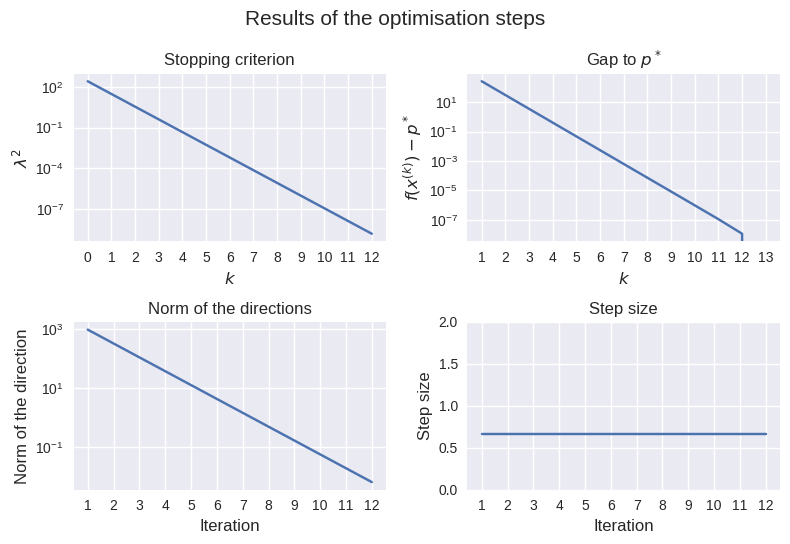

In [15]:
pbf = pb.plot_ouptuts()

\begin{equation}
\min_{x \in R^n} c^T x + \sum_{i = 1}^I \log(b_i - a_i^T x)
\end{equation}
with $N=100$ and $I=500$

In [16]:
from src.function_helper import LinearFunction, LogAffineFunction
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [17]:
N = 5
I = 2

In [18]:
c = nprd.uniform(-1, 1, size=(N, N))
b = nprd.uniform(1, 5, size=(I,))
a = nprd.uniform(-1, 1, size=(I, N))
Q = nprd.uniform(-1, 1, size=(N, N))
p = nprd.uniform(-1, 1, size=(N))
x = np.zeros(N)

In [19]:
log_aff_0 = LogAffineFunction(a[0, :], b[0])
log_aff_1 = LogAffineFunction(a[1, :], b[1])
lin_f = LinearFunction(c)
quad_f = Quadratic(Q.T @ Q/100, p)
objective = quad_f + log_aff_0 + log_aff_1

In [20]:
objective(x)

-2.1578945151406574

In [21]:
pbl = UnconstrainedOptimizer(objective, x, method="newton", max_iter=100)

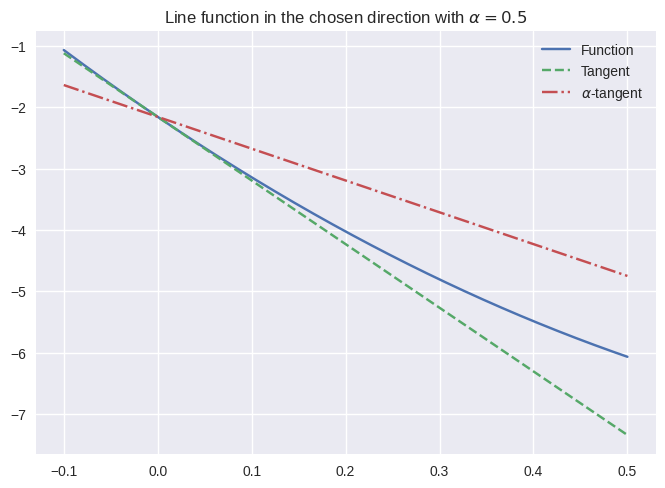

In [22]:
pbl.plot_line(0.5, t_range=(-0.1, 0.5))

In [23]:
error, alpha, beta = 1e-8, 0.4, 0.5
pbl.optimise(error, alpha, beta, verbose=True)

Step 1:
	 Criterion = 2.81e-01
	 y_1 = -7.5
	 y_0 - y_1 = 5.3
Step 2:
	 Criterion = 1.26e-01
	 y_2 = -7.8
	 y_1 - y_2 = 0.37
Step 3:
	 Criterion = 1.85e-02
	 y_3 = -8
	 y_2 - y_3 = 0.15
Step 4:
	 Criterion = 2.82e-04
	 y_4 = -8
	 y_3 - y_4 = 0.02
Step 5:
	 Criterion = 5.49e-08
	 y_5 = -8
	 y_4 - y_5 = 0.00028
Step 6:
	 Criterion = 2.04e-15
	 y_6 = -8
	 y_5 - y_6 = 5.5e-08
Last step 6:
	 Criterion = 2.04e-15
	 y_6 = -8
	 y_5 - y_6 = 5.5e-08


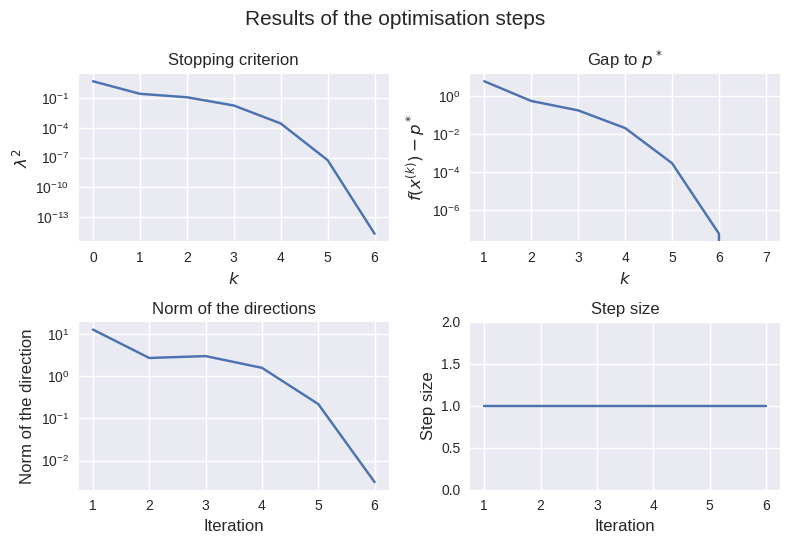

In [24]:
resfig = pbl.plot_ouptuts()

## 2D nonquadratic optimization example

\begin{equation}
f(x_1, x_2) = e^{x_1 + 3 x_2 - 0.1} + e^{x_1 - 3 x_2 - 0.1} + e^{-x_1 - 0.1}
\end{equation}

In [340]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [255]:
c1 = np.array([1, 3])
c2 = np.array([1, -3])
c3 = np.array([-1, 0])
f = lambda x: np.exp(c1 @ x - 0.1) + np.exp(c2 @ x - 0.1) + np.exp(c3 @ x - 0.1)
g = lambda x: np.array([
    np.exp(c1 @ x - 0.1) + np.exp(c2 @ x - 0.1) - np.exp(c3 @ x - 0.1),
    3*np.exp(c1 @ x - 0.1) - 3*np.exp(c2 @ x - 0.1)
])
h = lambda x: np.array([
    [
        np.exp(c1 @ x - 0.1) + np.exp(c2 @ x - 0.1) + np.exp(c3 @ x - 0.1),
        3*np.exp(c1 @ x - 0.1) - 3*np.exp(c2 @ x - 0.1),
    ],
    [
        3*np.exp(c1 @ x - 0.1) - 3*np.exp(c2 @ x - 0.1),
        9*np.exp(c1 @ x - 0.1) + 9*np.exp(c2 @ x - 0.1)
    ]
])

In [338]:
nqf = FunctionHelper(f, g, h)
x0 = np.array([-0.5, 0.5])
x1 = 0.9*np.array([1, 1])
pbnq = UnconstrainedOptimizer(func=nqf, x0=x0, method="newton")
pbnq2 = UnconstrainedOptimizer(func=nqf, x0=x0, method="gradient")
pbnq3 = UnconstrainedOptimizer(func=nqf, x0=x1, method="newton")
pbnq4 = UnconstrainedOptimizer(func=nqf, x0=x1, method="gradient")

In [339]:
pbnq.optimise(error=1e-12, alpha=0.1, beta=0.7, verbose=False)
pbnq2.optimise(error=1e-12, alpha=0.4, beta=0.7, verbose=False)
pbnq3.optimise(error=1e-12, alpha=0.1, beta=0.7, verbose=False)
pbnq4.optimise(error=1e-12, alpha=0.4, beta=0.2, verbose=False)

Last step 4:
	 Criterion = 1.31e-13
	 y_4 = 2.6
Break in the algorithm
Optimisation not converging.
Last step 100:
	 Criterion = 3.36e-05
	 y_100 = 2.6
Last step 7:
	 Criterion = 1.18e-14
	 y_7 = 2.6
Break in the algorithm
Optimisation not converging.
Last step 100:
	 Criterion = 3.09e-05
	 y_100 = 2.6


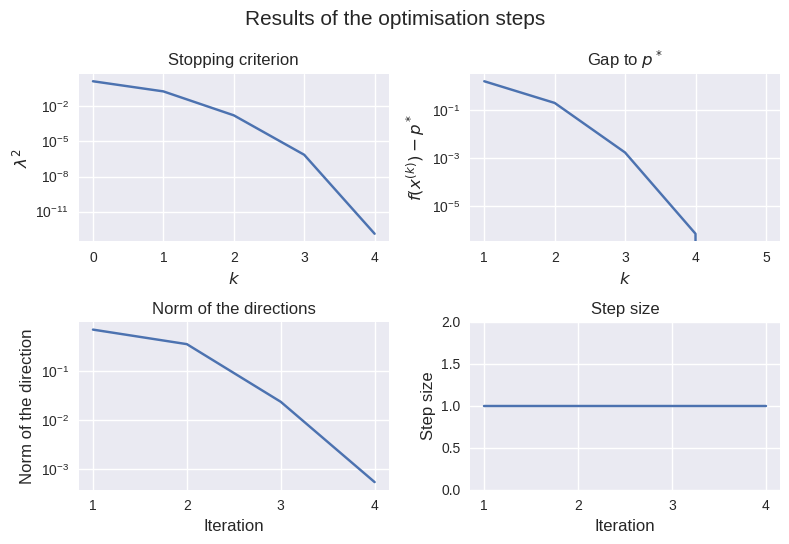

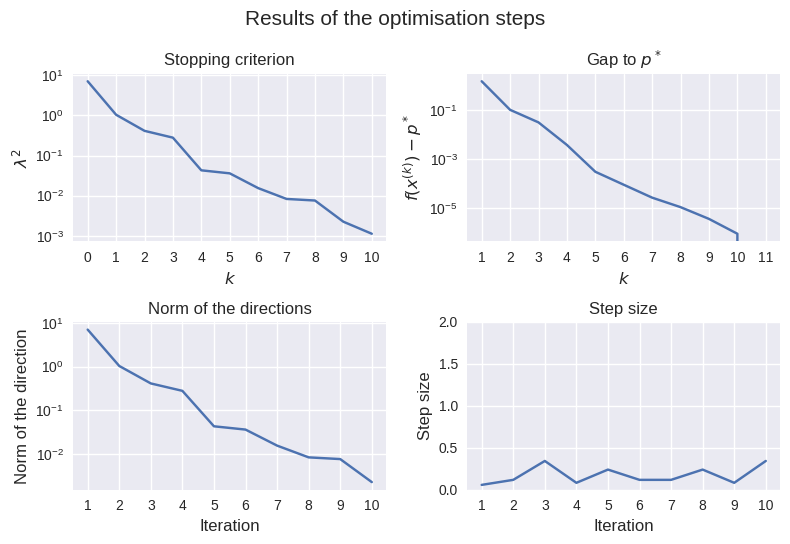

In [330]:
fignq = pbnq.plot_ouptuts()
fignq2 = pbnq2.plot_ouptuts()

In [341]:
min, max, step = -1, 1, 0.01
x, y = np.mgrid[min:max:step, min:max:step]
p = np.stack((x, y), axis=2)
z = np.array([[f(p[i, j]) for j in range(p.shape[1])] for i in range(p.shape[0])])

In [342]:
points = np.array(pbnq.xs)
points2 = np.array(pbnq2.xs)
points3 = np.array(pbnq3.xs)
points4 = np.array(pbnq4.xs)

In [350]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

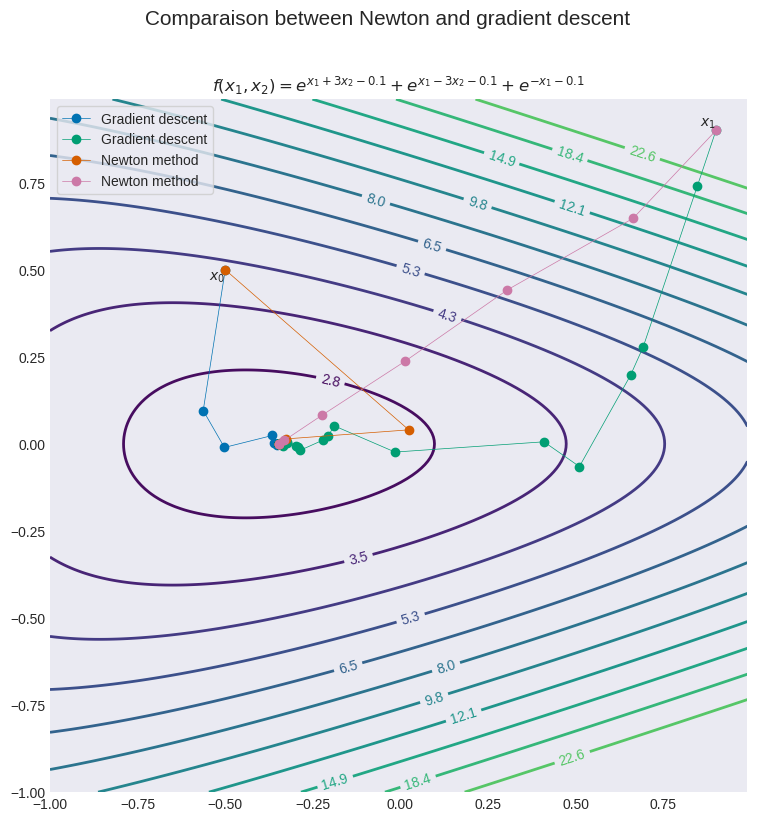

In [365]:
plt.style.use('seaborn-v0_8-colorblind')
fig, ax = plt.subplots(figsize=(9,9))
# im = ax.imshow(z,cmap=plt.cm.RdBu) # drawing the function
# adding the Contour lines with labels
min_z, max_z = np.log(1.1*np.min(z)), 0.8*np.log(np.max(z))
levels = np.exp(np.linspace(min_z, max_z, 11))
# cset = ax.contour(z, np.exp(np.linspace(min_z, max_z, 10)), linewidths=2, cmap=plt.cm.Set2)
cset = ax.contour(x, y, z, levels=levels, linewidths=2, cmap=plt.cm.viridis, norm=colors.LogNorm(vmin=z.min(), vmax=z.max()))
ax.clabel(cset, inline=True, fmt='%1.1f', fontsize=10)
# plt.colorbar(cset) # adding the colobar on the right
# latex fashion title
plt.title('$f(x_1, x_2) = e^{x_1 + 3 x_2 - 0.1} + e^{x_1 - 3 x_2 - 0.1} + e^{-x_1 - 0.1}$')
# ax.set(xticks=x[::10, 0], yticks=y[0, ::10])
plt.plot(points2[:, 0], points2[:, 1], marker='o', lw=0.5, label='Gradient descent')
plt.plot(points4[:, 0], points4[:, 1], marker='o', lw=0.5, label='Gradient descent')
plt.plot(points[:, 0], points[:, 1], marker='o', lw=0.5, label='Newton method')
plt.plot(points3[:, 0], points3[:, 1], marker='o', lw=0.5, label='Newton method')
plt.annotate('$x_0$', x0, horizontalalignment='right', verticalalignment='top')
plt.annotate('$x_1$', x1, horizontalalignment='right', verticalalignment='bottom')
fig.suptitle("Comparaison between Newton and gradient descent")
plt.legend(frameon=True)
plt.show()

## Barrier Method

In [3]:
N = 5
I = 2
b = nprd.uniform(1, 5, size=(I,))
a = nprd.uniform(-1, 1, size=(I, N))
Q = nprd.uniform(-1, 1, size=(N, N))
p = nprd.uniform(-1, 1, size=(N))
x = np.zeros(N)

In [4]:
from sklearn.datasets import make_regression

In [5]:
from src.optimisation import QuadraticBarrierMethod

In [82]:
N = 20
D = 50
M = 2*D

X, y, coefs = make_regression(
    n_samples=N,
    n_features=D,
    n_informative=int(0.8*D),
    n_targets=1,
    noise=0.2,
    coef=True,
    random_state=123
)

y /= 3*np.abs(y).max()

ld = 10
Q = 0.5*np.identity(N)
p = -y
A = np.vstack((X.T, -X.T))
b = ld * np.ones(M)

In [102]:
x0 = np.zeros(N)
t0 = 1
mu = 20
qp = QuadraticBarrierMethod(
    Q=Q,
    p=p,
    A=A,
    b=b,
    x0=x0,
    t0=t0,
    mu=mu,
    tol=0,
    error=1e-10,
    centering_kwargs=dict(
        alpha=0.2,
        max_iter=200,
        max_t_iter=200
    )
)

In [103]:
qp.optimise(verbose=True)

Step 1:
	 Criterion = 1.00e+02
	 y_1 = -0.011
	 Centering step final criterion = 2.2e-20
	 Number of steps in centering = 3
Step 2:
	 Criterion = 5.00e+00
	 y_2 = -0.094
	 Centering step final criterion = 4.4e-17
	 Number of steps in centering = 2
Step 3:
	 Criterion = 2.50e-01
	 y_3 = -0.095
	 Centering step final criterion = 4.9e-12
	 Number of steps in centering = 1
Step 4:
	 Criterion = 1.25e-02
	 y_4 = -0.095
	 Centering step final criterion = 1.7e-18
	 Number of steps in centering = 1
Step 5:
	 Criterion = 6.25e-04
	 y_5 = -0.095
	 Centering step final criterion = 5.3e-25
	 Number of steps in centering = 1
Step 6:
	 Criterion = 3.13e-05
	 y_6 = -0.095
	 Centering step final criterion = 2.9e-28
	 Number of steps in centering = 1
Step 7:
	 Criterion = 1.56e-06
	 y_7 = -0.095
	 Centering step final criterion = 8.7e-27
	 Number of steps in centering = 1
Step 8:
	 Criterion = 7.81e-08
	 y_8 = -0.095
	 Centering step final criterion = 2.6e-25
	 Number of steps in centering = 1
Step 9:


In [104]:
qp.number_centering_steps

[3, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1]

In [105]:
qp.xs

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([-0.22815328, -0.01633753, -0.42164936, -0.05454362, -0.11018373,
        -0.10049673,  0.15599868,  0.13940969, -0.10735558,  0.00075102,
         0.05158501,  0.12830744,  0.0296845 ,  0.14255382,  0.21449345,
        -0.20529629, -0.01941017,  0.1415575 ,  0.19062083, -0.0222615 ]),
 array([-1.00040733e-01,  1.14746482e-04, -3.38578898e-01, -2.90990141e-02,
        -4.71118278e-02, -1.18529328e-01,  5.98996764e-02,  1.13945279e-02,
        -1.20468094e-02, -6.12747237e-03,  9.37013651e-03,  1.13918028e-01,
         6.75504982e-02,  3.36353683e-02,  6.48257269e-02, -6.60239800e-02,
         4.09393709e-03,  1.41691931e-01,  2.92239677e-02, -6.48625113e-02]),
 array([-0.09235999,  0.00110111, -0.33359857, -0.02757353, -0.04333047,
        -0.11961044,  0.05413824,  0.00371962, -0.00633275, -0.00653986,
         0.00683922,  0.11305534,  0.06982068,  0.02710537,  0.05585268,
       

In [48]:
coefs

array([88.73887485, 17.90340747, 12.36393085, 68.91428702,  0.        ,
       58.34322818, 43.68951593,  1.8309055 , 27.46686232, 80.32297242,
       24.87980037, 30.86498974, 89.30472189, 53.66955009, 18.04534657,
       45.2526151 ,  0.        , 80.33655988, 79.45043176, 74.2209235 ,
       80.92784724,  0.        , 54.86335841, 84.92483772, 26.11206846,
       62.18447515, 22.19447677,  2.04497349, 70.45056793, 93.92958226,
        0.        , 36.8369297 ,  2.16026726, 11.5284533 , 14.68127556,
       94.44587633, 51.80200481, 28.40250787,  0.        ,  8.02858204,
        0.        , 69.98092479,  5.88817828,  0.        , 95.33548269,
        0.        , 34.88001804,  0.        ,  0.        , 60.64012589])